In [1]:
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import os
import seaborn as sns

C:\Users\13042\AppData\Local\Temp\ipykernel_18776\3433226797.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Data Cleaning:

No missing values are found in the dataset.


In [2]:
data_path = "online_shoppers_intention.csv"
df = pd.read_csv(data_path)
display(
    df.shape,
    df.head()
)

(12330, 18)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Step 1: Data Cleaning
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

# Step 2: Type Checking
data_types = df.dtypes

missing_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There are 125 duplicate entries.

In [4]:
duplicates

125

Type Checking:

Numeric data is represented as int64 or float64, which is suitable for statistical analysis.
The Month and VisitorType columns are of type object, which is expected for categorical data.
The Weekend and Revenue columns are boolean, indicating true/false values, which is appropriate for binary categories.

In [5]:
data_types

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

The duplicates have been removed, reducing the dataset from 12,330 to 12,205 rows.
The Month and VisitorType columns have been converted to categorical data types

In [6]:
# Removing duplicates
rows_before = df.shape[0]
df = df.drop_duplicates()

# Convert 'Month' and 'VisitorType' to categorical types
df['Month'] = df['Month'].astype('category')
df['VisitorType'] = df['VisitorType'].astype('category')

# Re-checking the data types after conversions
updated_data_types = df.dtypes

# Display the number of rows before and after removing duplicates
rows_after = df.shape[0]
rows_before, rows_after, updated_data_types

(12330,
 12205,
 Administrative                int64
 Administrative_Duration     float64
 Informational                 int64
 Informational_Duration      float64
 ProductRelated                int64
 ProductRelated_Duration     float64
 BounceRates                 float64
 ExitRates                   float64
 PageValues                  float64
 SpecialDay                  float64
 Month                      category
 OperatingSystems              int64
 Browser                       int64
 Region                        int64
 TrafficType                   int64
 VisitorType                category
 Weekend                        bool
 Revenue                        bool
 dtype: object)

Negative Values: There are no negative values in the numerical columns where it wouldn't make sense to have negative numbers.

Rate Validity: The BounceRates and ExitRates columns do not contain any values exceeding 1, which aligns with the expectation that these rates should be between 0 and 1.

In [7]:
# Checking for any negative values in columns where it doesn't make sense to have negatives
negative_values_check = (df.select_dtypes(include=['float64', 'int64']) < 0).sum()

# Checking if BounceRates and ExitRates exceed 1
invalid_bounce_rates = df[df['BounceRates'] > 1].shape[0]
invalid_exit_rates = df[df['ExitRates'] > 1].shape[0]

negative_values_check, invalid_bounce_rates, invalid_exit_rates

(Administrative             0
 Administrative_Duration    0
 Informational              0
 Informational_Duration     0
 ProductRelated             0
 ProductRelated_Duration    0
 BounceRates                0
 ExitRates                  0
 PageValues                 0
 SpecialDay                 0
 OperatingSystems           0
 Browser                    0
 Region                     0
 TrafficType                0
 dtype: int64,
 0,
 0)

ii. Statistical Analysis

In [8]:
# Statistical Analysis: Descriptive Statistics

descriptive_statistics = df.describe()
descriptive_statistics

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Here's a summary of the findings:

PageValues has the strongest positive correlation with Revenue, suggesting that pages with higher page values are more likely to result in a purchase. 

ProductRelated and ProductRelated_Duration also show positive correlations, indicating that more product-related interactions could lead to higher chances of a transaction.

Administrative, Informational, and their respective duration features have weaker but still positive correlations with Revenue.

BounceRates and ExitRates are negatively correlated with Revenue, which is intuitive as higher rates may indicate less engagement and lower likelihood of purchase.

Features like Browser, TrafficType, Region, and OperatingSystems have very low correlation values, indicating they might have less predictive power for Revenue.

In [9]:
import numpy as np
# correlation analysis
df['Revenue_int'] = df['Revenue'].astype(int)

df_numeric = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix_numeric = df_numeric.corr()

# Extracting the correlations with the target variable 'Revenue_int'
target_correlation_numeric = correlation_matrix_numeric['Revenue_int'].sort_values(ascending=False)

# Displaying the correlation values with 'Revenue_int'
target_correlation_numeric

Revenue_int                1.000000
PageValues                 0.491894
ProductRelated             0.156042
ProductRelated_Duration    0.150077
Administrative             0.136330
Informational              0.093626
Administrative_Duration    0.091768
Informational_Duration     0.069358
Browser                    0.024052
TrafficType               -0.005618
Region                    -0.012725
OperatingSystems          -0.014927
SpecialDay                -0.083601
BounceRates               -0.145091
ExitRates                 -0.204320
Name: Revenue_int, dtype: float64

PageValues: Sessions resulting in revenue tend to have significantly higher page values. This aligns with the positive correlation we observed, suggesting that higher page values are associated with a greater likelihood of transactions.

ProductRelated: There's a noticeable difference in the distribution of the number of product-related pages visited. Sessions with revenue show a trend towards higher product-related page counts, supporting the positive correlation seen earlier.

BounceRates: The boxplot indicates lower bounce rates for sessions leading to revenue, consistent with the negative correlation indicating that as bounce rates decrease, the likelihood of generating revenue increases.

ExitRates: Similar to bounce rates, lower exit rates are observed in sessions that resulted in revenue, aligning with the negative correlation with Revenue.

Similarly we can explore the correlation between different features using a heatmap.

<Axes: >

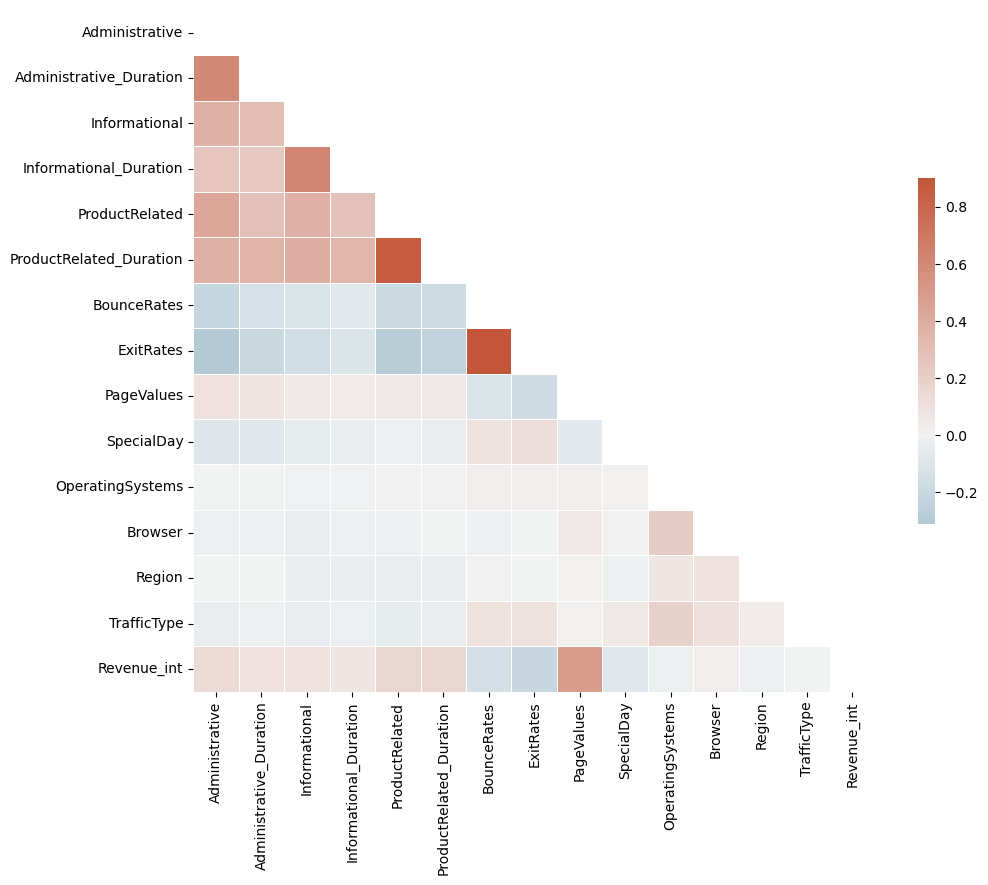

In [10]:
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=corr[corr!=1].max().max(), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

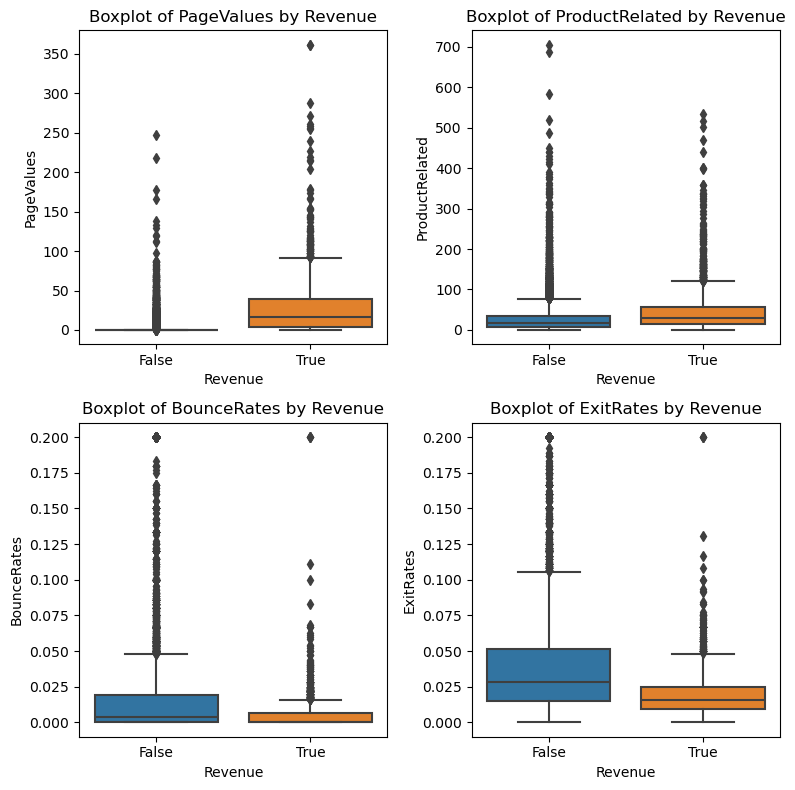

In [11]:
# Exploratory Data Analysis (EDA) - Data Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

for i, feature in enumerate(['PageValues', 'ProductRelated', 'BounceRates', 'ExitRates'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Revenue', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Revenue')

plt.tight_layout()
plt.show()


Page_Product_Interaction: The boxplot demonstrates a clear distinction in the interaction feature between sessions that resulted in revenue and those that did not. Sessions leading to revenue tend to have higher values of the Page_Product_Interaction feature, suggesting a relationship between these combined interactions and the likelihood of a purchase.

PageValues_Binned: The countplot shows the distribution of sessions with zero and positive page values, segmented by whether they resulted in revenue or not. There's a noticeable trend that sessions with positive PageValues are more likely to result in revenue, aligning with our earlier correlation findings.

c:\Users\13042\anaconda3\envs\my_env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\13042\anaconda3\envs\my_env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


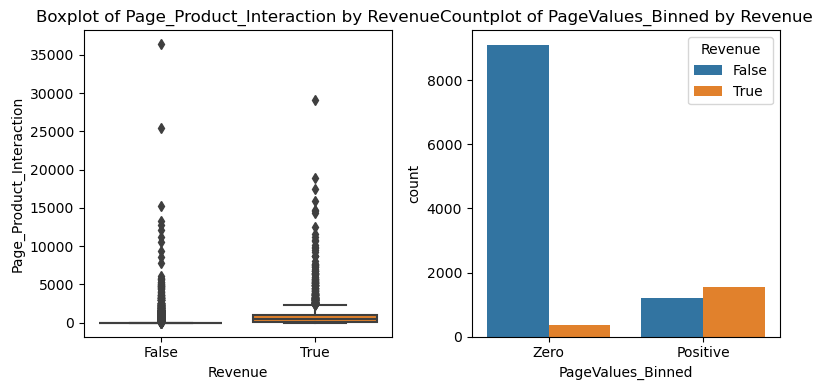

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating an interaction feature
df['Page_Product_Interaction'] = df['PageValues'] * df['ProductRelated']

# Bins are: "Zero" for 0 values, and "Positive" for greater than 0
df['PageValues_Binned'] = pd.cut(df['PageValues'], bins=[-np.inf, 0, np.inf], labels=['Zero', 'Positive'])

# Visualizing the new features in relation to Revenue
plt.figure(figsize=(8, 4))

# Interaction Feature
plt.subplot(1, 2, 1)
sns.boxplot(x='Revenue', y='Page_Product_Interaction', data=df)
plt.title('Boxplot of Page_Product_Interaction by Revenue')

# Binned PageValues
plt.subplot(1, 2, 2)
sns.countplot(x='PageValues_Binned', hue='Revenue', data=df)
plt.title('Countplot of PageValues_Binned by Revenue')

plt.tight_layout()
plt.show()



Encode Categorical Variables: Convert categorical variables to numerical using one-hot encoding

Split the Data: Divide the dataset into features (X) and the target variable (y), then split these into training and testing sets to evaluate the model's performance.

Model Preparation: Simple logistic regression model to predict revenue.

Training set: Contains 8,543 samples.
Testing set: Contains 3,662 samples.

Both sets include 32 features after encoding the categorical variables.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Isolating the target variable and the features
X = df.drop(['Revenue', 'Revenue_int'], axis=1)
y = df['Revenue_int']

# Identifying categorical columns for one-hot encoding
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Creating the column transformer with OneHotEncoder
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Applying the transformations to the features
X_processed = preprocessor.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Outputting the shape of the splits for verification
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8543, 32), (3662, 32), (8543,), (3662,))

Precision for Class 0 (No Revenue): 93% (high confidence in predicting non-revenue sessions) \
Precision for Class 1 (Revenue): 70% (moderate confidence in predicting revenue-generating sessions) \
Recall for Class 0: 96% (high capability in identifying actual non-revenue sessions) \
Recall for Class 1: 57% (moderate capability in identifying actual revenue sessions) \
F1-Score: Harmonic mean of precision and recall, providing a balance between the two in the context of an unbalanced dataset. 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# Initializing the logistic regression model
model = LogisticRegression(max_iter=10000)

# Training the model
model.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = model.predict(X_test)

# Calculating the accuracy and generating a classification report
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 scores for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print the classification report in a more readable format
print(f'Accuracy: {accuracy:.2f}\n')
print("Class\tPrecision\tRecall\tF1 Score")
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f"{i}\t{p:.2f}\t\t{r:.2f}\t{f:.2f}")

Accuracy: 0.90

Class	Precision	Recall	F1 Score
0	0.93		0.96	0.94
1	0.70		0.58	0.63


c:\Users\13042\anaconda3\envs\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From this naive prediction analysis we can see that we should balance the dataset to avoid bias (since 84.4% of the elements' class are 0s and just 15.6% are 1s)

In [15]:
sum(y)/len(y)

0.15632937320770177

# FPA 2

### One-hot encoding

In [16]:
X_encoded = pd.get_dummies(X)
bool_cols = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_cols] = X_encoded[bool_cols].astype(int)

### Oversampling

In [17]:
## Do we need oversampling?
from collections import Counter
Counter(y)

Counter({0: 10297, 1: 1908})

In [18]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE()
X_os, y_os = smote.fit_resample(X_encoded, y) 

### Training/Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=42)

### Feature Selection

We start out with

In [20]:
print(f"{X_os.shape[1]} features")

31 features


#### Recursive feature selection

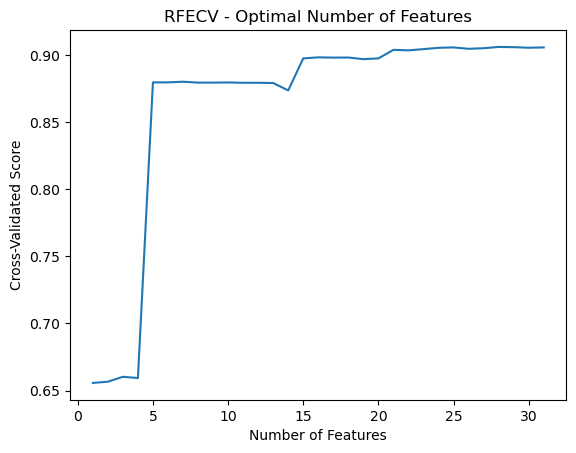

Optimal number of features: 28


In [21]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(solver='newton-cg'), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

mean_test_scores = rfecv.cv_results_['mean_test_score']

# Plot the number of features vs. cross-validated score
plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validated Score')
plt.title('RFECV - Optimal Number of Features')
plt.show()

# Print the optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

In [22]:
rfe_selected_columns = X_train.columns[rfecv.support_]
print(rfe_selected_columns)

Index(['Administrative', 'Informational', 'ProductRelated', 'BounceRates',
       'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'Weekend', 'Page_Product_Interaction',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'PageValues_Binned_Zero',
       'PageValues_Binned_Positive'],
      dtype='object')


### Anova


Cross-Validated ANOVA F-value Ranking:
PageValues_Binned_Zero           13539.767289
PageValues_Binned_Positive       10857.795395
PageValues                        3715.562138
ExitRates                         1670.480694
Page_Product_Interaction          1521.101772
Month_May                         1069.447194
VisitorType_Returning_Visitor     1039.641116
BounceRates                        854.093559
Month_Mar                          766.031982
ProductRelated_Duration            553.645396
Month_Dec                          516.872296
ProductRelated                     488.496948
Weekend                            375.490481
OperatingSystems                   364.183040
SpecialDay                         292.751828
Administrative                     240.967304
Administrative_Duration            155.712018
Month_June                         120.884256
Month_Aug                          116.827698
Month_Jul                          114.212699
Month_Feb                          112.6

C:\Users\13042\AppData\Local\Temp\ipykernel_18776\2590247415.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_perc = 100 * cum_sum / cum_sum[-1]


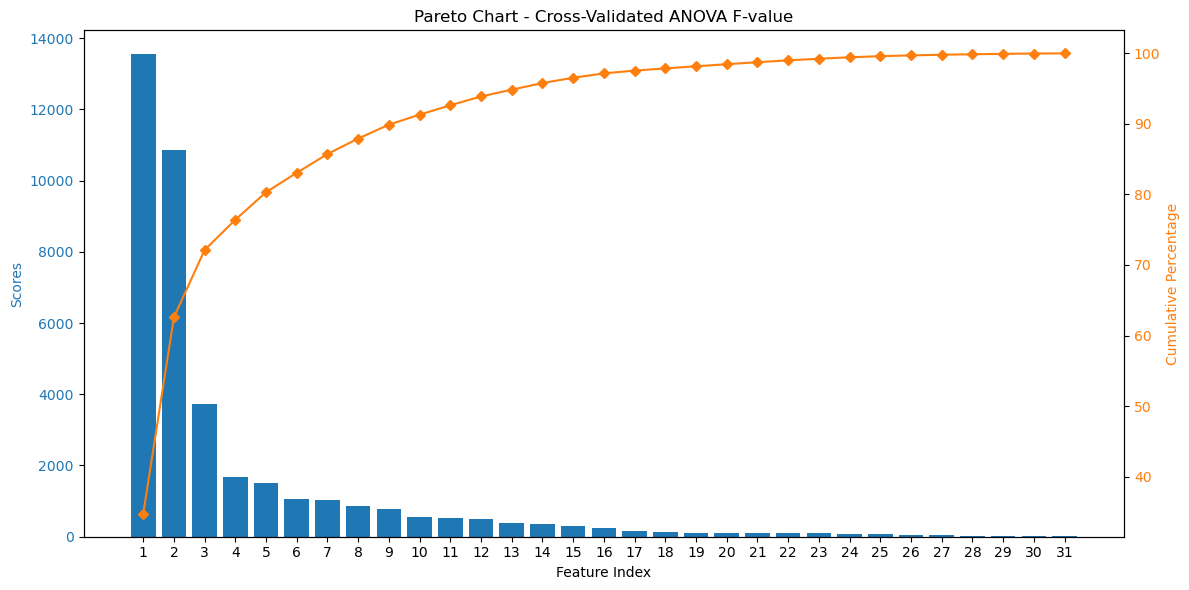

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold

def rank_features(scores, feature_names, method_name):
    feature_ranking = pd.Series(scores, index=feature_names)
    feature_ranking = feature_ranking.sort_values(ascending=False)
    print(f"\n{method_name} Ranking:")
    print(feature_ranking)
    
    # Pareto chart
    cum_sum = feature_ranking.cumsum()
    cum_perc = 100 * cum_sum / cum_sum[-1]
    
    indices = range(1, len(feature_ranking) + 1)
    
    fig, ax1 = plt.subplots(figsize=(12, 6))  # Increased figure size for better readability
    
    ax1.bar(indices, feature_ranking.values, color='C0')
    ax1.set_xlabel('Feature Index')
    ax1.set_ylabel('Scores', color='C0')
    ax1.tick_params(axis='y', labelcolor='C0')
    ax1.set_xticks(indices)
    ax1.set_xticklabels(indices)
    
    ax2 = ax1.twinx()
    ax2.plot(indices, cum_perc, color='C1', marker='D', ms=5)
    ax2.set_ylabel('Cumulative Percentage', color='C1')
    ax2.tick_params(axis='y', labelcolor='C1')
    
    plt.title(f'Pareto Chart - {method_name}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align to the right
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
    return(feature_ranking)
 
def cross_validated_feature_ranking(X, y, k=5):
    skf = StratifiedKFold(n_splits=k)
    feature_scores = np.zeros(X.shape[1])

    for train_index, test_index in skf.split(X, y):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        
        selector_anova = SelectKBest(score_func=f_classif, k='all')
        selector_anova.fit(X_train_cv, y_train_cv)
        feature_scores += selector_anova.scores_
    
    # Average scores over all folds
    feature_scores /= k
    return(rank_features(feature_scores, X.columns, "Cross-Validated ANOVA F-value"))
# Perform cross-validated feature ranking
feature_ranking_anova = cross_validated_feature_ranking(X_train, y_train)

Aqui hay que ponerle un threshold o algo, por la gráfica pareciera que los primeros 24-26 features están bien

In [46]:
anova_selected_columns = feature_ranking_anova.index[1:26]
print(anova_selected_columns)

Index(['PageValues_Binned_Positive', 'PageValues', 'ExitRates',
       'Page_Product_Interaction', 'Month_May',
       'VisitorType_Returning_Visitor', 'BounceRates', 'Month_Mar',
       'ProductRelated_Duration', 'Month_Dec', 'ProductRelated', 'Weekend',
       'OperatingSystems', 'SpecialDay', 'Administrative',
       'Administrative_Duration', 'Month_June', 'Month_Aug', 'Month_Jul',
       'Month_Feb', 'Month_Sep', 'Region', 'Informational_Duration',
       'Month_Oct', 'Informational'],
      dtype='object')


#### Genetic algorithms

A este código le modifiqué el solver del logistic regression y dupliqué max_iter (Línea 150) y ajustes a la función BestIndividual (Línea 78) https://github.com/renatoosousa/GeneticAlgorithmForFeatureSelection

In [47]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train_data.csv', index=False)

In [ ]:
import deap

python gaFeatureSelection.py path n_population n_generation
We can start with 2 x 31 features for n_population and 10 x 31 n_generation

In [61]:
!python gaFeatureSelection.py train_data.csv 62 310